In [29]:
%pip install keras
%pip install tensorflow
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install seaborn

import tensorflow as tf
from keras.datasets import cifar10

print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
TensorFlow version: 2.16.2
Keras version: 3.4.1


In [30]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = y_train.flatten()
y_test = y_test.flatten()

In [31]:
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
i = Input(shape=x_train[0].shape)

layer = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
layer = BatchNormalization()(layer)
layer = MaxPooling2D((2, 2))(layer)

layer = Conv2D(64, (3, 3), activation='relu', padding='same')(layer)
layer = BatchNormalization()(layer)
layer = MaxPooling2D((2, 2))(layer)

layer = Conv2D(128, (3, 3), activation='relu', padding='same')(layer)
layer = BatchNormalization()(layer)
layer = MaxPooling2D((2, 2))(layer)

layer = Flatten()(layer)
layer = Dropout(0.5)(layer)
layer = Dense(512, activation='relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(10, activation='softmax')(layer)

model = Model(i, layer)

In [32]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 42ms/step - accuracy: 0.3558 - loss: 2.0567 - val_accuracy: 0.4993 - val_loss: 1.5171
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.5367 - loss: 1.2965 - val_accuracy: 0.6275 - val_loss: 1.0871
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.6089 - loss: 1.1142 - val_accuracy: 0.6594 - val_loss: 0.9729
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.6454 - loss: 1.0200 - val_accuracy: 0.6855 - val_loss: 0.9056
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6778 - loss: 0.9299 - val_accuracy: 0.7155 - val_loss: 0.8248
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.6961 - loss: 0.8804 - val_accuracy: 0.7170 - val_loss: 0.8033
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 28ms/step - accuracy: 0.7189 - loss: 0.8157 - val_accuracy: 0.7086 - val_loss: 0.8357
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7332 -

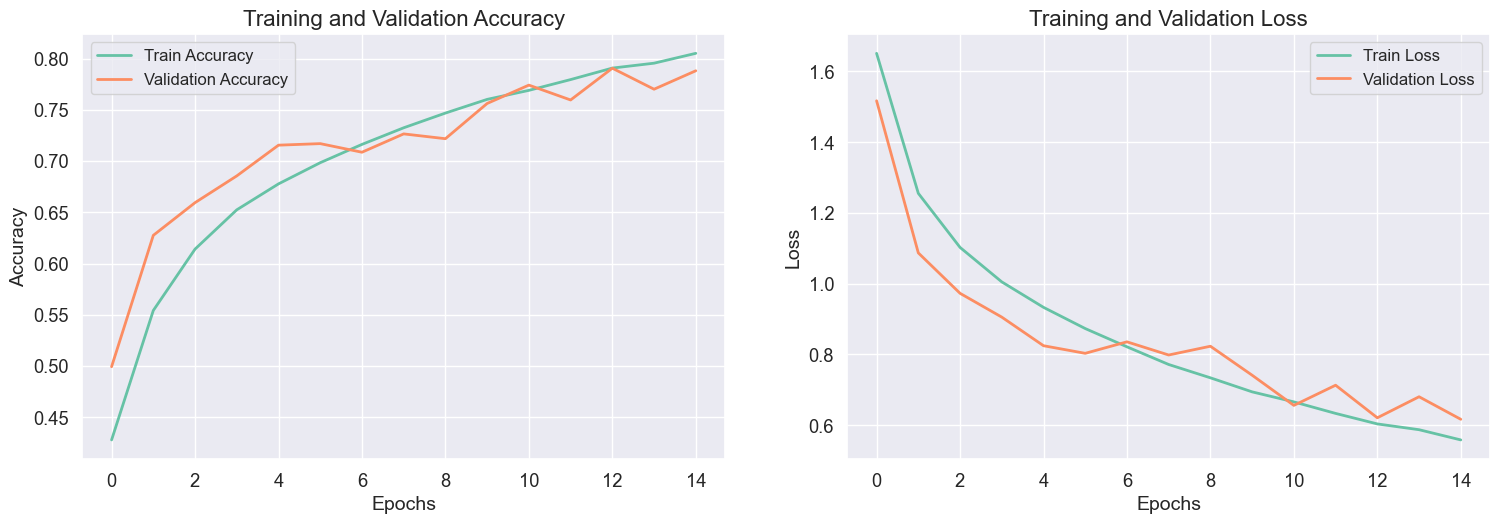

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set(style='dark', palette='Set2', font_scale=1.2, rc={'figure.figsize': [14, 6]})

# Criar a figura com subplots
plt.figure(figsize=(16, 6))

# Subplot para acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Subplot para perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Ajustar o layout
plt.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.9)
plt.show()
